# AutoPandas

<img src="logo_autodata.png" alt="drawing" width="200"/>

<center><h2> Process, visualize and use data easily.</h2></center>

In [1]:
import autopandas as ad
%reload_ext autoreload
%autoreload 2

Using TensorFlow backend.


# 1. Read data

#### Easily load CSV, AutoML or pd.DataFrame.

ad.AutoData is a subclass of pd.DataFrame representing 2D data frames:
* Examples are in rows
* Features are in columns

In [2]:
input_file = 'autopandas/data/wine.csv'
data = ad.read_csv(input_file, sep=None, engine='python')

**Keys:**
* **Row**: train, valid, test, header
* **Column**: X, y, categorical, numerical

In [3]:
data.indexes['numerical']

['residual sugar', 'total sulfur dioxide', 'density']

In [4]:
data.get_data('header')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Set the target variable (class) if needed

In [5]:
data.set_class('quality') #['age', 'fnlwgt']) #['income', 'gender']
# data.train_test_split(test_size=0.3) # automatically done

#### Get a subset of data

In [6]:
#data.get_data('X_header')          # five first rows of X (examples without the class target)
data.get_data('categorical_header') # five first rows of categorical variables
#data.get_data('y_test')            # test set of target
#data.get_data('numerical_header')  # five first rows of numerical variables

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,0.049,14.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,0.050,30.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,0.058,47.0,3.19,0.40,9.9,6
4,7.2,0.23,0.32,0.058,47.0,3.19,0.40,9.9,6


### Descriptors

In [7]:
print(data.get_task())
print(data.ratio()) # ratio dimension / number of examples
print(data.symbolic_ratio())  # ratio of symbolic attributes
print(data.missing_ratio())   # ratio of missing values
print(data.class_deviation()) # 
print(data.skew().max())  # max skewness
print(data.skew().mean()) # mean skewness
data.describe()

classification
0.002449979583503471
0.25
0.0
0.8856385749678312
5.023330682759703
1.2050348501831898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 2. Processings


Parameters: **method** and **key** (targeted set).

**Missing values imputation**

In [68]:
data = data.imputation() # mean, median, remove, most

**Encoding**

In [23]:
data = data.encoding('label', 'categorical') # encode categorical variables
#data = data.encoding('one_hot', 'categorical',) # one_hot, likelihood, count, target, etc.

#data.encoding('drop', 'numerical') # simply drop numerical columns

**Normalization**

In [31]:
data = data.normalization('min-max', 'numerical') # min-max, standard
#data2 = data.normalization('min-max', 'numerical')

In [18]:
data.min(axis=0)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

#### Dimensionality reduction

In [52]:
data.reduction(method='hashing').get_data('header') # pca, lda, tsne, feature_hashing

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,2.8,170.0,-0.27,-7.0,-46.4510,2.685,0.0,-20.7
1,0.0,0.0,3.5,132.0,-0.30,-6.3,-15.4840,3.009,0.0,-1.6
2,0.0,0.0,4.1,97.0,-0.28,-8.1,-31.4351,2.910,0.0,-6.9
3,0.0,0.0,3.9,186.0,-0.23,-7.2,-48.3956,2.928,0.0,-8.5
4,0.0,0.0,3.9,186.0,-0.23,-7.2,-48.3956,2.928,0.0,-8.5


# 3. Visualization

#### Class distribution

y set plot


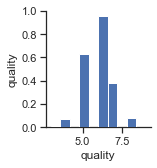

In [17]:
data.plot('y') # alias data.get_data('y').plot()

#### 2D PCA plot

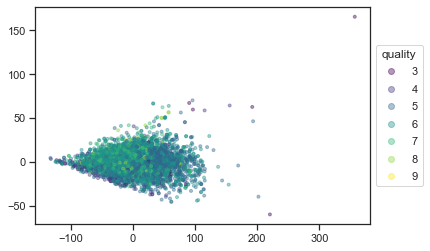

In [22]:
data.pca(n_components=2).plot(c=data.get_data('y')) # for class coloration: c=data.get_data('y')

#### T-SNE

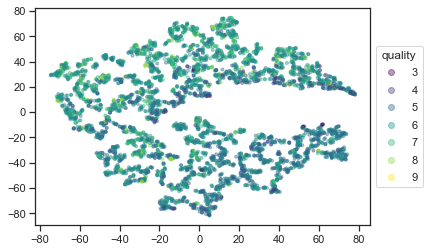

In [88]:
data.tsne().plot(c=data.get_data('y'))

#### Linear Discriminant Analysis

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.7/site-packages/matplotlib/collections.py:960: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


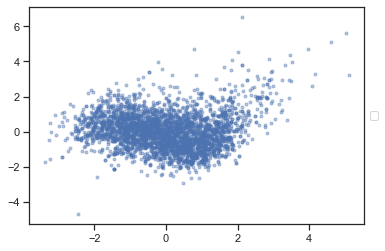

In [34]:
data.get_data('train').lda(n_components=2).plot()

#### Heatmap

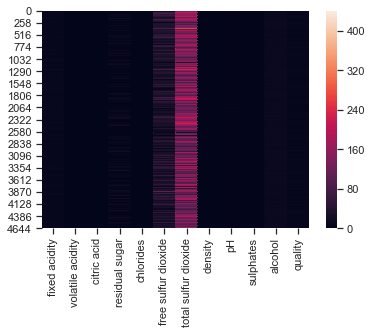

In [23]:
data.plot() # alias data.heatmap()

#### Correlation matrix plot

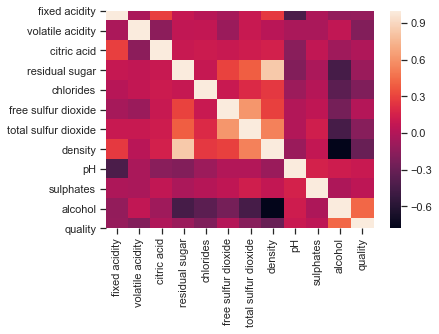

In [24]:
data.corr().plot() # alias data.correlation()

#### Features pairplot

In [60]:
# data.pairplot() # max_features is set to 12 by default

#### Features boxplot

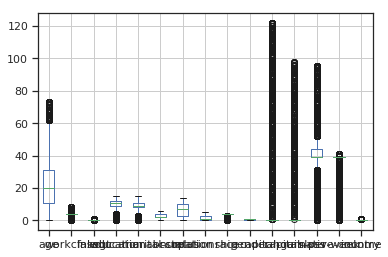

In [14]:
data.boxplot()

# 4. Benchmark

#### Compute a model's score on the task

By default, the method naturally train model on train set and test it on test set.

In [8]:
data.score()

0.6283185840707964

In [14]:
data.set_class('income')
data.score()

0.8502593502593503

#### Call auto-sklearn

In [7]:
# data.score(method='automatic')

#### Compute score with custom model and scoring function

In [60]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

data.score(model=LogisticRegression(), metric=f1_score)

0.5154021702045072

# 5. Comparison

#### Two similar datasets (subsets of the same distribution)

In [9]:
ad1 = ad.read_csv('autopandas/data/squares1.csv') # CSV separator is infered automatically
ad2 = ad.read_csv('autopandas/data/squares2.csv')

### 3 types of distances:

#### 1) Between points

...

#### 2) Between columns
* Kolmogorov-Smirnof
* Mutual information
* Jensen-Shannon

#### 3) Between distributions (datasets)

#### Nearest Neihbors Adversarial Accuracy

In [63]:
ad1.distance(ad2)

0.017798270469472133

* Euclidean?
* MMD?
* etc.

#### Adversarial score / Binary classification / Discriminant / Classifier score

In [64]:
print(ad1.distance(ad2, method='discriminant'))

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20, 20))
print(ad1.distance(ad2, method='discriminant', model=model))

0.531025641025641
0.5207692307692308


#### Task score
Some possible parameters: model, metric.

In [65]:
ad1.set_class('0.0.29')
ad2.set_class('0.0.29')
print(ad1.score(verbose=True)) # Trained on ad1 and tested on ad1 (with split)
print(ad2.score()) # Trained on ad2 and tested on ad2 (with split)
print(ad1.score(test=ad2)) # Trained on ad1 and tested on ad2
print(ad2.score(test=ad1)) # Trained on ad2 and tested on ad1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1166
         1.0       1.00      1.00      1.00       765
         5.0       1.00      1.00      1.00       169

   micro avg       1.00      1.00      1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100

Metric: <function accuracy_score at 0x7fed60431840>
1.0
0.9988888888888889
1.0
0.9988888888888889


### Overlay plot

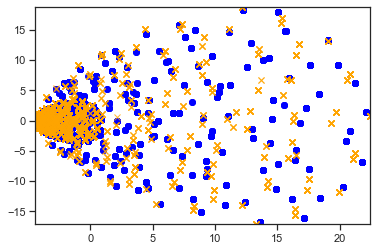

In [10]:
pca1 = ad1.pca(n_components=2)
pca2 = ad2.pca(n_components=2)
pca1.plot(ad=pca2)

TODO: class coloration


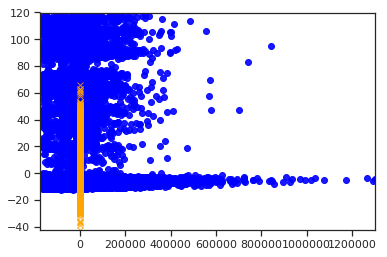

In [20]:
#pca1 = data.pca(n_components=2)
#pca2 = data2.pca(n_components=2)
#ad.plot(pca1, pca2)

### Marginal plots

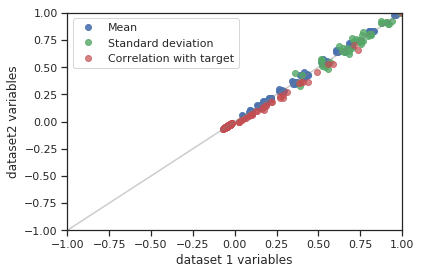

In [42]:
ad1.compare_marginals(ad2, method='all', target='0.0') # if no target, it uses the defined class

# 6. Generation

#### Copy

In [16]:
#data.generate(model=model)
gen = ad.generators.Copycat()
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3970,6.7,0.18,0.31,10.60,0.035,42.0,143.0,0.99572,3.08,0.49,9.8,7
2473,6.0,0.29,0.21,15.55,0.043,20.0,142.0,0.99658,3.11,0.54,10.1,6
2689,7.6,0.18,0.28,7.10,0.041,29.0,110.0,0.99652,3.20,0.42,9.2,6
1971,6.3,0.41,0.30,3.20,0.030,49.0,164.0,0.99270,3.53,0.79,11.7,7
2718,5.2,0.28,0.29,1.10,0.028,18.0,69.0,0.99168,3.24,0.54,10.0,6


#### Additive Noise Model

In [12]:
gen = ad.generators.ANM() # use 'model' parameter to use custom model for imputation
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,16,13,28,0.048466,34,73,0.336195,0.080727,45,4,47,3
1,24,40,32,0.027607,3,38,0.187471,0.056221,47,43,80,4
2,31,28,35,0.012270,25,35,0.241299,0.080509,39,25,38,4
3,18,48,32,0.098006,27,7,0.154060,0.076923,45,13,82,4
4,28,32,34,0.187883,37,33,0.339907,0.218913,67,24,12,3


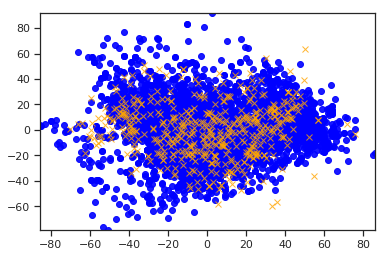

In [13]:
pca1 = data.pca(n_components=2)
pca2 = gen.sample(n=500).pca(n_components=2)
pca1.plot(ad=pca2)

#### Artificial data

In [31]:
gen = ad.generators.Artificial()
gen.sample(n=5)

,0_X,1,0_y
3,0.696138,0.811803,0
85,1.052230,-0.474005,1
96,0.840202,0.456881,0
79,1.848675,0.221370,1
73,0.138944,0.192228,1


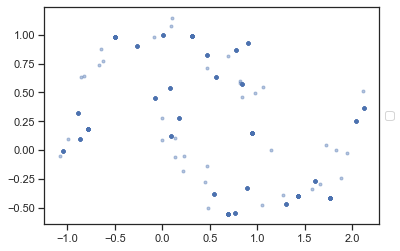

In [32]:
gen.sample(n=100).get_data('X').plot()

In [28]:
gen = ad.generators.Artificial(method='blobs')
gen.sample(n=5)

,0_X,1,0_y
91,0.116989,1.461115,2
37,-1.688269,6.084785,1
16,-0.084087,0.809094,2
51,6.871693,-5.603088,0
28,-1.781605,1.314074,2


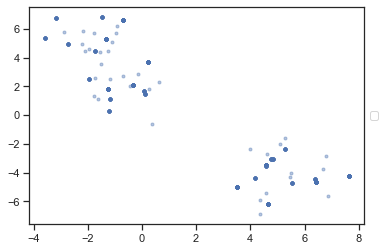

In [29]:
gen.sample(n=100).get_data('X').plot()